In [5]:
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np

def process_movement(xml_str, initial_position, speed = 1, angle = 45, time_step = 1):
    root = ET.fromstring(xml_str)
    pos = np.array(initial_position, dtype=float)  # Convert initial_position to float
    direction = np.array([np.cos(np.radians(angle)), np.sin(np.radians(angle)), 0])
    df = pd.DataFrame([{'time': 0, 'x': pos[0], 'y': pos[1], 'z': pos[2]}])
    time = 0  # Initialize time
    
    for child in root:
        if child.tag == 'set':
            speed = float(child.get('speed', speed))
            angle = float(child.get('angle', angle))
            direction = np.array([np.cos(np.radians(angle)), np.sin(np.radians(angle)), 0])
        elif child.tag == 'repeat':
            for i in range(int(child.get('n'))):
                for grandchild in child:
                    if grandchild.tag == 'forward':
                        d = float(grandchild.get('d'))
                        steps = int(d / (speed * time_step))
                        for _ in range(steps):
                            time += time_step  # Update time
                            pos += speed * time_step * direction
                            df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
                    elif grandchild.tag == 'turn':
                        angle += float(grandchild.get('angle'))
                        direction = np.array([np.cos(np.radians(angle)), np.sin(np.radians(angle)), 0])
    return df

xml_str = """
<movement>
    <set speed="1" angle="45"/>
        <repeat n="4">
            <forward d="1000"/>
            <turn angle="180"/>
        </repeat>
</movement>
"""

initial_position = [0, 0, 0] # x, y, z
df = process_movement(xml_str, initial_position)
print(df)


/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_9517/3670511023.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_9517/3670511023.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_9517/3670511023.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_9517/3670511023.py:26: 

        time             x             y    z
0        0.0  0.000000e+00  0.000000e+00  0.0
1        1.0  7.071068e-01  7.071068e-01  0.0
2        2.0  1.414214e+00  1.414214e+00  0.0
3        3.0  2.121320e+00  2.121320e+00  0.0
4        4.0  2.828427e+00  2.828427e+00  0.0
...      ...           ...           ...  ...
3996  3996.0  2.828427e+00  2.828427e+00  0.0
3997  3997.0  2.121320e+00  2.121320e+00  0.0
3998  3998.0  1.414214e+00  1.414214e+00  0.0
3999  3999.0  7.071068e-01  7.071068e-01  0.0
4000  4000.0 -6.639134e-14 -7.638334e-14  0.0

[4001 rows x 4 columns]


/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_9517/3670511023.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_9517/3670511023.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_9517/3670511023.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'time': time, 'x': pos[0], 'y': pos[1], 'z': pos[2]}, ignore_index=True)
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_9517/3670511023.py:26: 

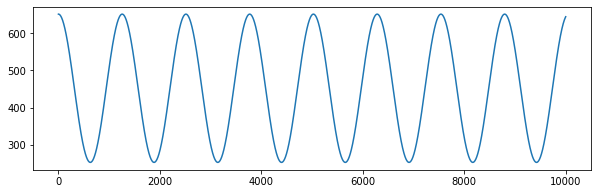

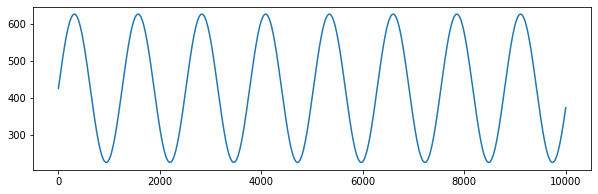

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3), facecolor="white")
plt.plot(df["time"], df["x"])
plt.show()

plt.figure(figsize=(10, 3), facecolor="white")
plt.plot(df["time"], df["y"])
plt.show()